# 1. Завантаження даних для дослідження

1.1. Завантаження бібліотек для виконанн операцій з даними

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sps
from scipy.stats import poisson
from scipy import stats
import matplotlib.pyplot as mp
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


1.2. Заваннтаження таблиці даних з файлу csv та призначаємо колонку індеків

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col=0)
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


1.3. Видаляємо рядки-дуплікати для очищення даних

In [4]:
df = df.drop_duplicates()
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


# 2. Дослідження набору даних (описова статистика та візуалізація)

2.1. Визначення загальної інформації щодо вмісту таблиці

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


Всього в наявності у досліджуваному Data Frame 13 полів, з яких:
 1 - int64;
 1 - bool;
 7 - object або текстові;
 4 - float64.
Змістовних рядків всього 3694, при чому за деякими полями вони мають нульові значення.

2.2. Визначаємо кількість рядків, що мають нульові значення

In [6]:
df_null = df.isnull().sum()
df_null

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

Виявлено сумарно до 3000 нульових сутностей по полям: 'depth', 'height' і 'width' (тіьки праметри габаритів)

2.3. Формуємо першу досліджувану таблицю з виключеними записами, що мають 
     нульові значення

In [7]:
df1 = df.dropna()
df1.count()

item_id              1899
name                 1899
category             1899
price                1899
old_price            1899
sellable_online      1899
link                 1899
other_colors         1899
short_description    1899
designer             1899
depth                1899
height               1899
width                1899
dtype: int64

Після видалення записів з нульовими значеннями в таблиці залишилось тільки 1899 записів.  

In [8]:
df1.info() # Переглянемо загальну інформацію за попередньо очищеною таблицею

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 3 to 3688
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            1899 non-null   int64  
 1   name               1899 non-null   object 
 2   category           1899 non-null   object 
 3   price              1899 non-null   float64
 4   old_price          1899 non-null   object 
 5   sellable_online    1899 non-null   bool   
 6   link               1899 non-null   object 
 7   other_colors       1899 non-null   object 
 8   short_description  1899 non-null   object 
 9   designer           1899 non-null   object 
 10  depth              1899 non-null   float64
 11  height             1899 non-null   float64
 12  width              1899 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 194.7+ KB


2.4. Переглянемо кількісні характеристики за унікальними значеннями в різних 
     полях утвореної таблиці та спробуємо визначити ті поля, за якими можливо 
     здробити додаткові очищення/переворення та дослідження. 

In [9]:
# 'category'

df1_cat=df1['category'].value_counts()
print(df1_cat) 
len(df1.category.unique())

Bookcases & shelving units              375
Sofas & armchairs                       223
Chairs                                  213
Wardrobes                               199
Cabinets & cupboards                    199
Chests of drawers & drawer units        121
Tables & desks                          103
TV & media furniture                     95
Outdoor furniture                        81
Children's furniture                     78
Beds                                     78
Nursery furniture                        62
Bar furniture                            24
Sideboards, buffets & console tables     20
Café furniture                           13
Trolleys                                  9
Room dividers                             6
Name: category, dtype: int64


17

Поле category містить 17 унікальних категорій, кожна з яких має кількісний вміст в діапазоні (6:375).

Є смисл включити в дослідження цей ряд даних. 

In [10]:
# 'old_price'

df1_op = df1['old_price'].value_counts()
nop=df1[df1['old_price']=='No old price']
print(df1_op)

No old price    1541
SR 595             6
SR 995             6
SR 400             5
SR 275             5
                ... 
SR 1,695           1
SR 1,182           1
SR 2,985           1
SR 1,595           1
SR 1,785           1
Name: old_price, Length: 248, dtype: int64


Поле old_price має 248 уніальних категорій, з них одна категорія "No old price" є превалюючою - складає 1541 запис.

Зробимо припущення стосовно того,  що можна розглянути продукти тільки за новим прайсом та визначити динаміку.

In [11]:
# 'old_price'

df_op = df['old_price'].value_counts()
nop1=df[df['old_price']=='No old price']
print(df_op)

No old price    3040
SR 995            12
SR 1,385          11
SR 595            10
SR 275             8
                ... 
SR 3,145           1
SR 39              1
SR 2,105           1
SR 752             1
SR 1,050           1
Name: old_price, Length: 365, dtype: int64


Поле old_price у повній нефільтрованій таблиці має 365 уніальних категорій, з них одна категорія "No old price" є превалюючою - складає 3040 запис.

Зробимо припущення стосовно того,  що за умови, що старий прайс, або відсутні відмітки про прайс складають 10% від товарів за новим прайсом, то можна розглянути степінь впливу на формування ціни продукту позначки про тип прайса.

In [12]:
# 'sellable_online'

df1['sellable_online'].value_counts()

True     1886
False      13
Name: sellable_online, dtype: int64

Поле sellable_online містить тільки 2 унікальні категорії. Причому категорія 'True' (наявність можливості прдажу он-лайн) має привалюючий характер. З огляду на сучасні тенденції, є смисл розглядати дані з фільтрацією по цьому полю, адже користувачу важче оцінити варіабельність ціни товару, якщо він не має доступу до інформації про неї он-лайн.  

In [13]:
#  'other_colors'

df1['other_colors'].value_counts()

No     988
Yes    911
Name: other_colors, dtype: int64

За ознакою кольору є смисл переглянути вплив монохромного та поліхромного фарбування на ціноутворення.

In [14]:
#  'designer'

df1_d=df1['designer'].value_counts()
print(df1_d)

IKEA of Sweden                                                                                                                                                                                                                                                                                                                            427
Ola Wihlborg                                                                                                                                                                                                                                                                                                                              100
Jon Karlsson                                                                                                                                                                                                                                                                                                                               8

По полю designer наявний 191 унікаьний запис. Є можливість очистити список дизайнерів і таким чином звузити список унікальних  записів. І вже відповідно звуженого списку визначати подальші взаємозв'язки. 

Поля: item_id, name, link та short_description не представляють наразі інтересу 
      для дослідження, аде містять інформацію, яка напряму не впливає на 
      ціноутворення, отже робимо припущення, що можемо видалити їх з 
      досліджуваної таблиці.

In [15]:
df1 = df1.drop(['item_id','name','link','short_description'], axis=1)
df1.columns

Index(['category', 'price', 'old_price', 'sellable_online', 'other_colors',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

Поля: depth, height та width представляють особливий інтерес, як такі, 
      що визначають габаритність товару, тому на них звернемо особливу увагу 
      при аналізі даних. 

Результуюча таблиця після попередньої очистки, але без фільтрацій має такий вигляд:

In [16]:
df1.head()

,category,price,old_price,sellable_online,other_colors,designer,depth,height,width
3,Bar furniture,69.0,No old price,True,Yes,Henrik Preutz,50.0,100.0,60.0
4,Bar furniture,225.0,No old price,True,No,Marcus Arvonen,60.0,43.0,74.0
5,Bar furniture,345.0,No old price,True,No,Carina Bengs,45.0,91.0,40.0
6,Bar furniture,129.0,No old price,True,No,K Hagberg/M Hagberg,44.0,95.0,50.0
8,Bar furniture,129.0,No old price,True,No,K Hagberg/M Hagberg,44.0,95.0,50.0


2.5. Підготуємо таблицю до подальших статистичних досліджень, створивши певні перетворення та додаткові розрахункові стовпці:
- сантиметри перекладемо в метри;
- ознаку фарбування наведемо числовими характеристиками в окрмому стовпці;
- визначимо поле volume, в якому розраховується об'єм товару.

In [17]:
df1["other_colors_1"] = df1["other_colors"].map(dict(Yes=1, No=0))
df1['depth']= df1['depth']/100
df1['height']=df1['height']/100
df1['width'] = df1['width']/100
df1['volume'] = df1['depth']*df1['height']*df1['width']

df1.head()

,category,price,old_price,sellable_online,other_colors,designer,depth,height,width,other_colors_1,volume
3,Bar furniture,69.0,No old price,True,Yes,Henrik Preutz,0.50,1.00,0.60,1,0.30000
4,Bar furniture,225.0,No old price,True,No,Marcus Arvonen,0.60,0.43,0.74,0,0.19092
5,Bar furniture,345.0,No old price,True,No,Carina Bengs,0.45,0.91,0.40,0,0.16380
6,Bar furniture,129.0,No old price,True,No,K Hagberg/M Hagberg,0.44,0.95,0.50,0,0.20900
8,Bar furniture,129.0,No old price,True,No,K Hagberg/M Hagberg,0.44,0.95,0.50,0,0.20900


2.6. Дослідимо загальну статистику по категоріям:

Спочатку розглянемо розподілення ціни відповідно до категорій товару, та загальну статистику відповідно до категорії.

<AxesSubplot:xlabel='price', ylabel='Count'>

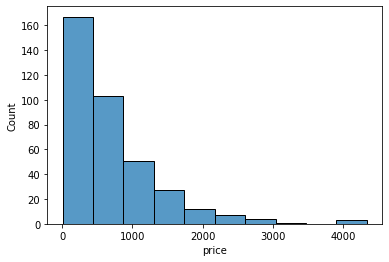

In [18]:
# Bookcases & shelving units

df1_bar_furniture = df1[df1.category == "Bookcases & shelving units"]
sns.histplot(df1_bar_furniture.price, bins=10)

In [19]:
df1[df1.category == "Bookcases & shelving units"].describe()

,price,depth,height,width,other_colors_1,volume
count,375.000000,375.000000,375.00000,375.000000,375.000000,375.000000
mean,685.849600,0.382800,1.38688,1.199307,0.458667,0.718531
std,665.422435,0.133534,0.65773,0.726381,0.498954,0.642051
min,6.000000,0.010000,0.03000,0.030000,0.000000,0.000040
25%,235.000000,0.300000,0.78500,0.650000,0.000000,0.237440
50%,495.000000,0.370000,1.61000,0.890000,0.000000,0.486400
75%,925.000000,0.420000,1.92500,1.740000,1.000000,1.071084
max,4335.000000,1.590000,2.40000,3.440000,1.000000,3.435831


<AxesSubplot:xlabel='price', ylabel='Count'>

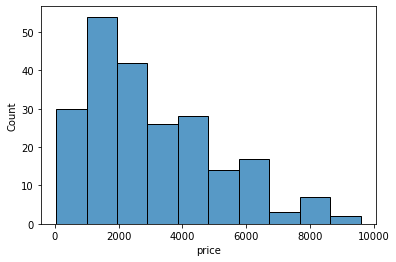

In [20]:
# Sofas & armchairs

df1_bar_furniture = df1[df1.category == "Sofas & armchairs"]
sns.histplot(df1_bar_furniture.price, bins=10)

In [21]:
df1[df1.category == "Sofas & armchairs"].describe()

,price,depth,height,width,other_colors_1,volume
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,3009.560538,1.075426,0.838161,1.965650,0.753363,2.082002
std,2097.557512,0.397456,0.197285,0.863747,0.432023,1.679016
min,40.000000,0.060000,0.040000,0.150000,0.000000,0.005200
25%,1397.500000,0.900000,0.800000,1.325000,1.000000,1.056520
50%,2500.000000,0.980000,0.840000,2.000000,1.000000,1.746000
75%,4347.500000,1.100000,1.020000,2.520000,1.000000,2.517424
max,9585.000000,2.570000,1.040000,3.870000,1.000000,8.570016


<AxesSubplot:xlabel='price', ylabel='Count'>

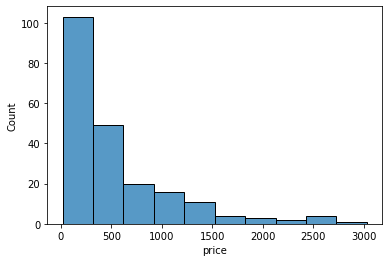

In [22]:
# Chairs

df1_bar_furniture = df1[df1.category == "Chairs"]
sns.histplot(df1_bar_furniture.price, bins=10)

In [23]:
df1[df1.category == "Chairs"].describe()

,price,depth,height,width,other_colors_1,volume
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,546.409390,0.621972,0.797559,0.608592,0.333333,0.353996
std,575.239231,0.275369,0.212678,0.243535,0.472515,0.357574
min,15.000000,0.210000,0.130000,0.040000,0.000000,0.005888
25%,175.000000,0.470000,0.750000,0.440000,0.000000,0.176800
50%,345.000000,0.520000,0.830000,0.520000,0.000000,0.230400
75%,695.000000,0.690000,0.950000,0.690000,1.000000,0.383250
max,3032.000000,1.640000,1.730000,1.590000,1.000000,2.252160


<AxesSubplot:xlabel='price', ylabel='Count'>

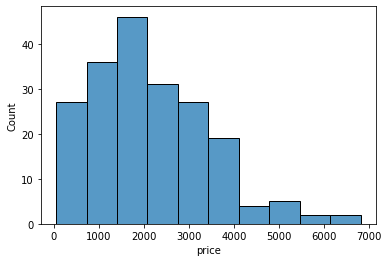

In [24]:
# Wardrobes

df1_bar_furniture = df1[df1.category == "Wardrobes"]
sns.histplot(df1_bar_furniture.price, bins=10)

In [25]:
df1[df1.category == "Wardrobes"].describe()

,price,depth,height,width,other_colors_1,volume
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,2146.135678,0.566080,2.148141,1.615377,0.216080,2.049891
std,1318.763169,0.141281,0.371206,0.660617,0.412608,1.296822
min,49.000000,0.350000,0.400000,0.440000,0.000000,0.384000
25%,1111.500000,0.500000,2.010000,1.200000,0.000000,1.167660
50%,1870.000000,0.580000,2.360000,1.500000,0.000000,2.076800
75%,3012.500000,0.600000,2.360000,2.000000,0.000000,2.484000
max,6805.000000,2.100000,2.810000,4.200000,1.000000,13.629000


<AxesSubplot:xlabel='price', ylabel='Count'>

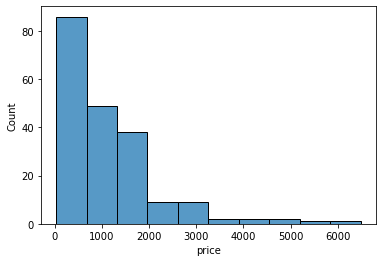

In [26]:
# Cabinets & cupboards

df1_bar_furniture = df1[df1.category == "Cabinets & cupboards"]
sns.histplot(df1_bar_furniture.price, bins=10)

In [27]:
df1[df1.category == "Cabinets & cupboards"].describe()

,price,depth,height,width,other_colors_1,volume
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,1113.319095,0.391558,1.237387,1.112312,0.743719,0.607283
std,1032.249505,0.085340,0.640532,0.678326,0.437680,0.599082
min,35.000000,0.020000,0.100000,0.040000,0.000000,0.000160
25%,380.500000,0.350000,0.700000,0.600000,0.000000,0.211138
50%,920.000000,0.400000,1.170000,0.900000,1.000000,0.401850
75%,1422.500000,0.450000,1.900000,1.435000,1.000000,0.803196
max,6480.000000,1.000000,3.010000,3.200000,1.000000,2.880000


<AxesSubplot:xlabel='price', ylabel='Count'>

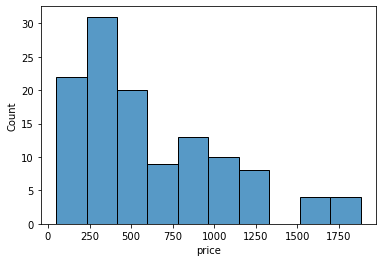

In [28]:
# Chests of drawers & drawer units

df1_bar_furniture = df1[df1.category == "Chests of drawers & drawer units"]
sns.histplot(df1_bar_furniture.price, bins=10)

In [29]:
df1[df1.category == "Chests of drawers & drawer units"].describe()

,price,depth,height,width,other_colors_1,volume
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,629.698347,0.471570,0.795289,0.772810,0.446281,0.301436
std,447.736169,0.049816,0.269735,0.409024,0.499173,0.208006
min,49.000000,0.230000,0.080000,0.250000,0.000000,0.015040
25%,295.000000,0.470000,0.610000,0.410000,0.000000,0.131250
50%,495.000000,0.470000,0.730000,0.700000,0.000000,0.240000
75%,920.000000,0.500000,0.990000,0.900000,1.000000,0.406080
max,1880.000000,0.600000,1.450000,1.610000,1.000000,1.090400


<AxesSubplot:xlabel='price', ylabel='Count'>

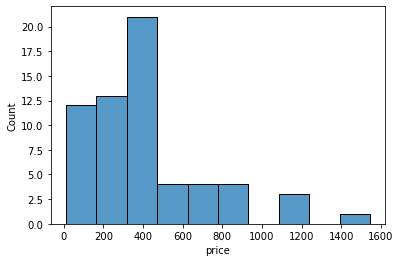

In [30]:
# Nursery furniture

df1_bar_furniture = df1[df1.category == "Nursery furniture"]
sns.histplot(df1_bar_furniture.price, bins=10)

In [31]:
df1[df1.category == "Nursery furniture"].describe()

,price,depth,height,width,other_colors_1,volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,404.580645,0.433710,0.932258,0.703871,0.370968,0.319687
std,304.538218,0.134399,0.478671,0.253664,0.487007,0.271272
min,10.000000,0.210000,0.100000,0.220000,0.000000,0.012600
25%,196.250000,0.300000,0.560000,0.475000,0.000000,0.135690
50%,367.500000,0.440000,0.910000,0.600000,0.000000,0.240000
75%,472.500000,0.500000,1.215000,0.937500,1.000000,0.403098
max,1545.000000,0.790000,1.920000,1.500000,1.000000,1.440000


За представленими вище вибірковими частотими гістограмами, очевидно, що розподілення ціни для кожної категорії товару є індивідуальним і єдиному правилу не підпорядковується. 
Таким же чином можна зробити висновок і стосовно загальностатистичних ознак для кожної обраної категорії. 

2.7. Тепер необхідно обрати поля, які впливають на формування ціни

[0 1 2 3 4]
[[1.0000e+00 6.0000e-01 5.0000e-01 3.0000e-01 6.9000e+01]
 [4.3000e-01 7.4000e-01 6.0000e-01 1.9092e-01 2.2500e+02]
 [9.1000e-01 4.0000e-01 4.5000e-01 1.6380e-01 3.4500e+02]
 ...
 [2.3600e+00 1.0000e+00 6.0000e-01 1.4160e+00 2.1000e+03]
 [2.3600e+00 1.5000e+00 6.6000e-01 2.3364e+00 3.9850e+03]
 [2.3600e+00 2.0000e+00 6.6000e-01 3.1152e+00 2.0450e+03]]


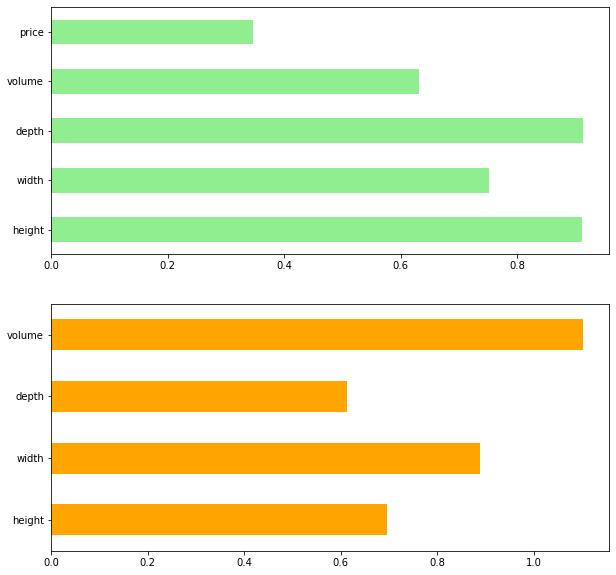

In [32]:
# Код вибору впливаючих полів

from sklearn.feature_selection import mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

_, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))

#df_X = df.drop(['price'], axis=1)
df_X = df1[['height', 'width', 'depth', 'volume', 'price']]
df_y = df1['category']

importance_0 = mutual_info_classif(df_X, df_y)
feature_importances = pd.Series(importance_0, df_X.columns)
feature_importances.plot(kind='barh', color='lightgreen',ax=ax1)


df_X_1 = df1[['height', 'width', 'depth','volume' ]]
df_y_1 = df1['price']

importance_1 = mutual_info_regression(df_X_1, df_y_1)
feature_importances_1 = pd.Series(importance_1, df_X_1.columns)
feature_importances_1.plot(kind='barh', color='orange',ax=ax2)

chi2_features = SelectKBest(chi2, k = 5)
X_kbest_features = chi2_features.fit(df_X, df_y)
print(X_kbest_features.get_support(indices=True))

transformed_X = chi2_features.transform(df_X)
print(transformed_X)

plt.show()

На основі вище зазначених лінійчастих гістограм, очевидно: 
- для визначення поля category важливими є параметри розмірів (depth, height), 
  а не ціна.
- для визначення ціни товара важливим є крітерій об'єму, який ми розрахували 
  вище (поза критерієм об'єму можна описувати як значущу позицію width).


Перевіряємо та утчнюємо висновки різними методами:

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Встановлюємо параметр регуляризації C=1. Виконуємо інстанціацію моделі.
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=7).fit(df_X, df_y)
# Де X, y - вхідні та вихідні дані відповідно.
model = SelectFromModel(logistic, prefit=True, max_features=2, threshold='0.8*mean')

X_new = model.transform(df_X)

print(model.get_support(indices=True),X_new)

[1 2] [[0.6  0.5 ]
 [0.74 0.6 ]
 [0.4  0.45]
 ...
 [1.   0.6 ]
 [1.5  0.66]
 [2.   0.66]]


C:\Users\Eugen\miniconda3\envs\pythonProject1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


При виборі впливових полів на основі регресії лінійної моделі, модельвказує на поля [1 2] з df_X = df1[['height', 'width', 'depth', 'volume', 'price']], тобто для визначення поля category важливими є параметри розмірів (depth, width)

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(f_regression, k=2).fit(df_X_1, df_y_1)
data = selector.transform(df_X_1)
print(selector.scores_, selector.get_support(indices=True), data)

[ 152.24015162 2753.30085838 1213.01136312 4219.51011316] [1 3] [[0.6     0.3    ]
 [0.74    0.19092]
 [0.4     0.1638 ]
 ...
 [1.      1.416  ]
 [1.5     2.3364 ]
 [2.      3.1152 ]]


За моделлю SelectKBest та f_regression для визначення ціни товара важливими є поля  [1 3] з df_X_1 = df1[['height', 'width', 'depth','volume' ]], тобто width і volume відповідно


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_X_1_scaled = pd.DataFrame(scaler.fit_transform(df_X_1), columns = df_X_1.columns)
df_X_1_scaled.head()

,height,width,depth,volume
0,0.327759,0.138756,0.191406,0.022009
1,0.137124,0.172249,0.230469,0.014005
2,0.297659,0.090909,0.171875,0.012016
3,0.311037,0.114833,0.167969,0.015332
4,0.311037,0.114833,0.167969,0.015332


За методом MinMaxScaler маштабуємо значення нашої таблиці з df_X_1 = df1[['height', 'width', 'depth','volume']]

In [36]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.02)
selector.fit(df_X_1_scaled)
df_X_1_scaled.columns[selector.get_support()]

Index(['height', 'width'], dtype='object')

За методом VarianceThreshold (селектор функцій, що видаляє усі функції з низькою дисперсією), на основі маштабованих даних фіксуємо, що для визначення ціни товара важливими є поля ['height', 'width'].

In [37]:
selector.variances_  # виведення показників дисперсії для наборів даних по полям

array([0.04401907, 0.03437102, 0.01426107, 0.00663396])

Показники дисперсії вказують на те, що межу в 0,02 перетнули тільки перші 2 ряди даних, відповідно  height і width

In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)
model.fit(df_X_1, df_y_1)
importances = model.feature_importances_
print(importances)

[0.07088096 0.08878122 0.05894457 0.78139325]


Метод RandomForestRegressor за умови встановленої  кількості дерев - 10, надає наступні коефіцієнти регресії [0.096678   0.08575394 0.0505195  0.76704856] для df_X_1 = df1[['height', 'width', 'depth','volume']], отже очевидно, що за цим методом найбільш точно визначають ціну дані по пополю volume.

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
model.fit(df_X, df_y)
importances = model.feature_importances_
print(importances)

[0.21972634 0.1561527  0.24657554 0.17908546 0.19845996]


Ми вже визначили, що поля у df_X = df1[['height', 'width', 'depth', 'volume', 'price']] не достатньо добре описують категорію товару кожен окремо. Власне це і демнструють коефіцієнти регресії по даним цих полів. Вони низькі.  

2.8. Побудуємо гістограми для деяких параметрів, та подивимось на приблизний розподіл

Text(0.5, 1.0, 'price')

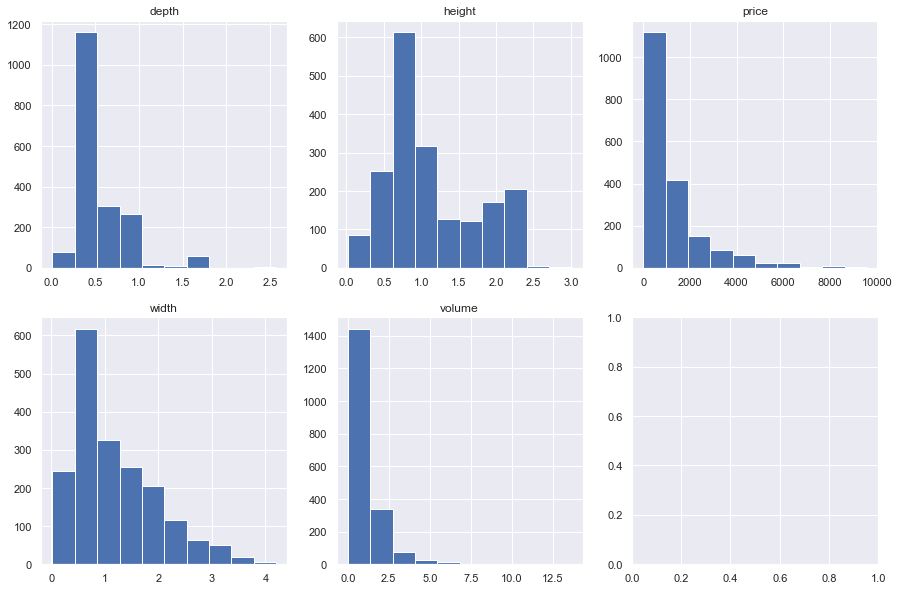

In [40]:
sns.set('notebook')
fig, axs = plt.subplots(2,3, figsize=(15,10))
axs[0][0].hist(df1['depth'])
axs[0][0].set_title('depth')
axs[0][1].hist(df1['height'])
axs[0][1].set_title('height')
axs[1][0].hist(df1['width'])
axs[1][0].set_title('width')
axs[1][1].hist(df1['volume'])
axs[1][1].set_title('volume')
axs[0][2].hist(df1['price'])
axs[0][2].set_title('price')

Візуально розподіли можна порівняти з експоненційним розподілом. Причому очевидно, що розподіли volume і price більш за все "схожі" між собою, можна ще додати розподіл depth та width, як потенційно корельовані.

2.9. Побудуємо ще ряд візуалізацій з метою дослідження взаємозв'язків між даними.

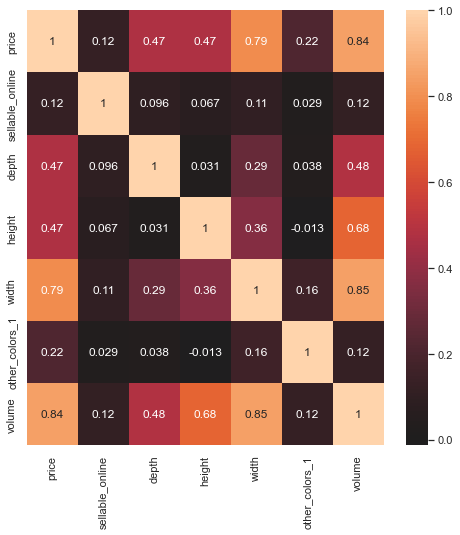

In [41]:
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(method='spearman'), xticklabels=df1.corr().columns, yticklabels=df1.corr().columns, center=0, annot=True)
plt.show()

За даною візуалізацією прослідковується креляція між ціною та об'ємом виробу на рівні коефіцієнта кореляції 0,84, окремо можна виділити ріень кореляції між ціною та шириною виробу із значенням 0,79.

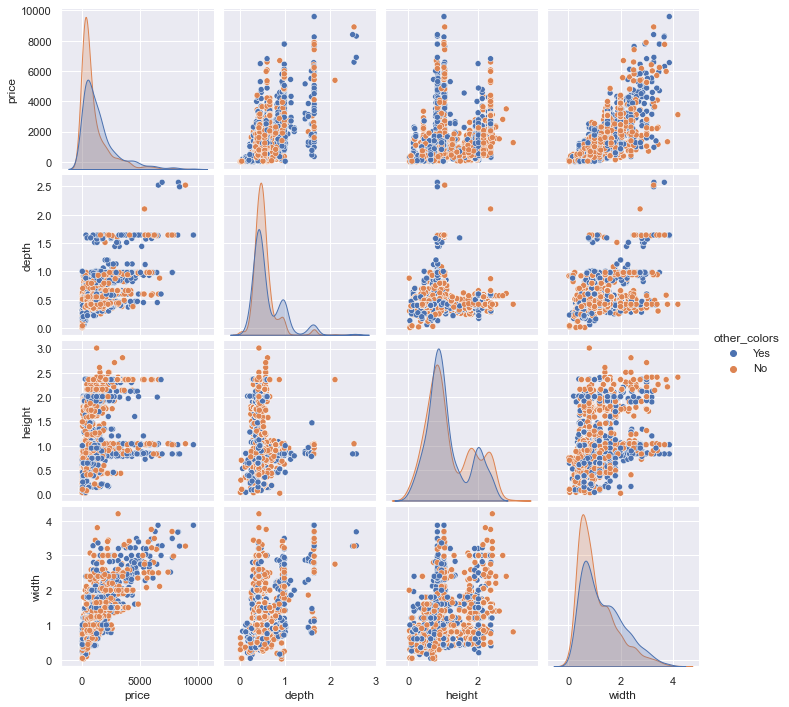

In [42]:
sns.pairplot(df1[['price','depth','height','width','other_colors','category']], hue='other_colors')

За цією групою візуалізацій можна стверджувати, що рзподіли відповідно до кольорів за цінами на товар є приблизно однаковими

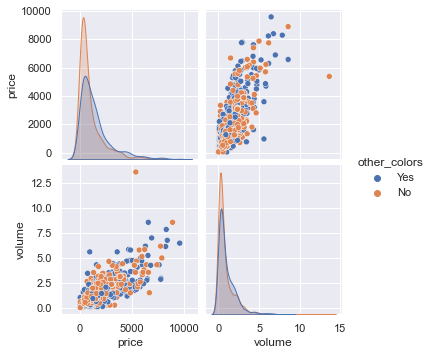

In [43]:
sns.pairplot(df1[['price','volume','other_colors','category']], hue='other_colors')

При заміні 3-х окремих вимірів об'єму на єдине значення об'єму, очевидно,  що колір не має ососбливого впливу на формування ціни, а розподілення відповідно до кольорів є однаквим.

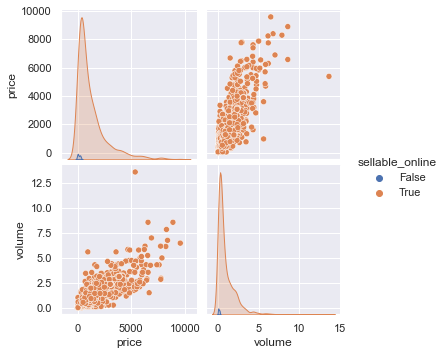

In [44]:
sns.pairplot(df1[['price','volume','sellable_online','category']], hue='sellable_online')

За розподіленням відповідно до поля sellable_online, очевидно,що можемо сміливо ігнорувати sellable_online(False), адже воно не впливає за своєю кіькістю на розподіл. 

Окремо варто розглянути наповнення множини категорій та множини цін по відповідним категоріям:

[Text(0, 0, 'Bar furniture'),
 Text(1, 0, 'Beds'),
 Text(2, 0, 'Bookcases & shelving units'),
 Text(3, 0, 'Cabinets & cupboards'),
 Text(4, 0, 'Café furniture'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Chests of drawers & drawer units'),
 Text(7, 0, "Children's furniture"),
 Text(8, 0, 'Nursery furniture'),
 Text(9, 0, 'Outdoor furniture'),
 Text(10, 0, 'Room dividers'),
 Text(11, 0, 'Sideboards, buffets & console tables'),
 Text(12, 0, 'Sofas & armchairs'),
 Text(13, 0, 'Tables & desks'),
 Text(14, 0, 'Trolleys'),
 Text(15, 0, 'TV & media furniture'),
 Text(16, 0, 'Wardrobes')]

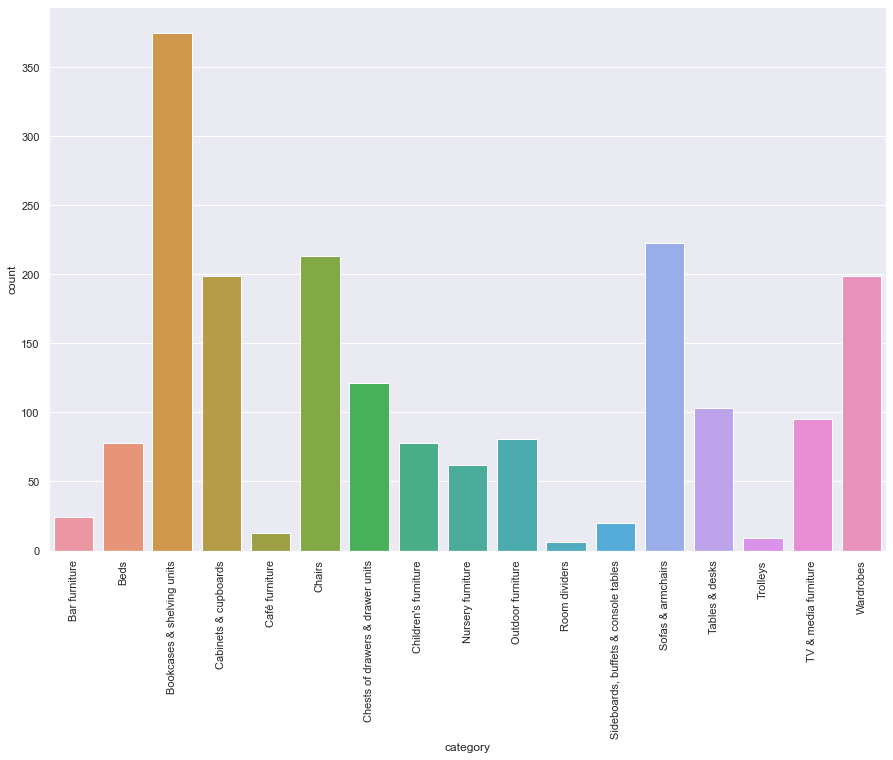

In [45]:
# Частотна гістограма по категоріям
sns.set('notebook')
axs = plt.subplots(figsize=(15,10))
sns.countplot(x=df1['category']).set_xticklabels(df1['category'].unique(), rotation=90)

Очевидно,що частота появи тих або інших катеогорій товаров різна і варіюється в широкому спектрі, отже зміни і прогнозування цін треба рзглядати в межах кожної групи товарів окремо.

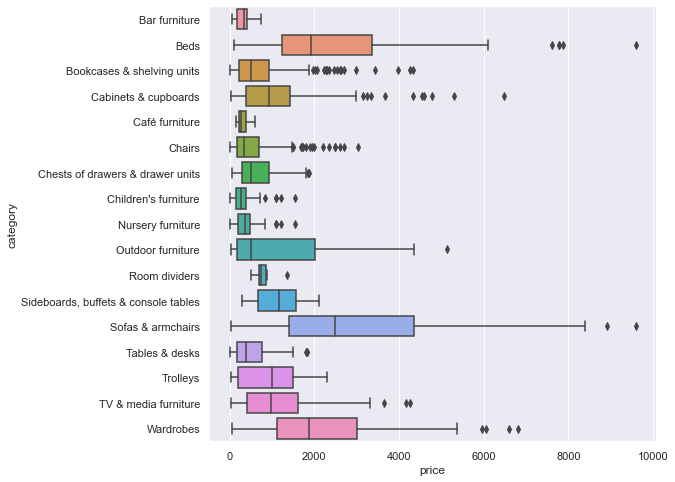

In [46]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=df1, x='price', y='category')
plt.show()

Розподіл цін в межах кожної окремої категорії є різним, мають місце різні варіанти boxplot з викидами (причому викиди спостерігаються тільки в сторону більше) та без, з великою дисперсією та з щільним розподіленням. Отже цінові характеристики сильно залежать від самої категорії, врамках якої їх розглядають.  

# 3.  Перевірка гіпотез

## Гипотеза №1
За гістограмою цін можна було зробити таке припущення, що ціна має експоненційне розподілення. Якщо випадкова величина має експонеціальне розподілення, то її логарифм має нормальне розподілення. Побудуємо гістограму для логарифму цін та перевіримо нульову гіпотезу про те, що ціни маютьлогнормальний розподіл.


3       4.234107
4       5.416100
5       5.843544
6       4.859812
8       4.859812
          ...   
3683    7.138867
3684    7.126891
3685    7.649693
3686    8.290293
3688    7.623153
Name: price, Length: 1899, dtype: float64


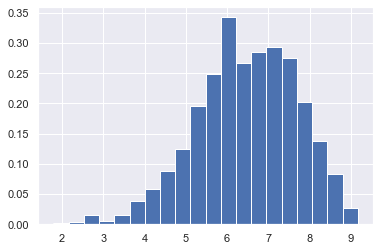

In [47]:
plt.hist(np.log(df1.price), bins=20,density=True)
print(np.log(df1.price))

3      -1.825636
4      -0.861883
5      -0.513361
6      -1.315459
8      -1.315459
          ...   
3683    0.542796
3684    0.533031
3685    0.959304
3686    1.481625
3688    0.937665
Name: price, Length: 1899, dtype: float64


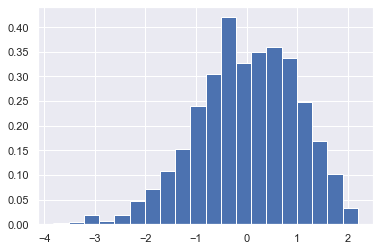

In [48]:
sample_h = (np.log(df1.price)-np.log(df1.price).mean())/np.log(df1.price).std()
print(sample_h)
hist_h = plt.hist(sample_h, bins=20,density=True)

In [49]:
h0_1_p_value = stats.shapiro(sample_h).pvalue
h0_1_p_value_1 = stats.shapiro(np.log(df1.price)).pvalue
h0_1_p_value_2 = stats.kstest(sample_h, cdf=stats.norm.cdf).pvalue
h0_1_p_value_3 = stats.normaltest(sample_h).pvalue
h0_1_p_value_4 = stats.ks_2samp(sample_h, stats.norm.rvs(size=len(sample_h))).pvalue
h0_1_p_value_5 = stats.mannwhitneyu(sample_h, stats.norm.rvs(size=len(sample_h))).pvalue

print(f'p-value:',h0_1_p_value,h0_1_p_value_1,h0_1_p_value_2,h0_1_p_value_3,h0_1_p_value_4,h0_1_p_value_5,
      sep="\n")

p-value:
1.7961984330461256e-11
1.795874039756118e-11
0.0033146982561446806
1.1309131841046769e-10
0.03387156412523153
0.06404763412711494


З тестових розрахунків очевидно, що p_value дуже мале, отже великою долею вірогідності можна сверджувати, що нульова гіпотеза має бути відкинута.
Можемо спробувати збільшити кількість корзин до 50.

3       4.234107
4       5.416100
5       5.843544
6       4.859812
8       4.859812
          ...   
3683    7.138867
3684    7.126891
3685    7.649693
3686    8.290293
3688    7.623153
Name: price, Length: 1899, dtype: float64


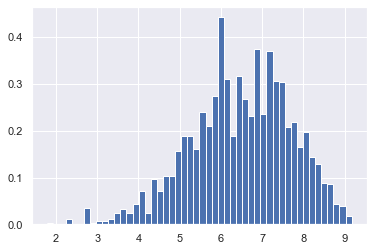

In [50]:
plt.hist(np.log(df1.price), bins=50,density=True)
print(np.log(df1.price))

3      -1.825636
4      -0.861883
5      -0.513361
6      -1.315459
8      -1.315459
          ...   
3683    0.542796
3684    0.533031
3685    0.959304
3686    1.481625
3688    0.937665
Name: price, Length: 1899, dtype: float64


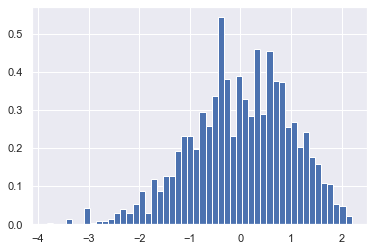

In [51]:
sample_h = (np.log(df1.price)-np.log(df1.price).mean())/np.log(df1.price).std()
print(sample_h)
hist_h = plt.hist(sample_h, bins=50,density=True)

При такій кількості корзин стають очевидними викиди ліворуч та праворуч від купола розподілу. Отже гіпотеза про нормальний розподіл цін віявилась невдалою.

,price
3,-0.809814
4,-0.700116
5,-0.615733
6,-0.767622
8,-0.767622
...,...
3683,0.027687
3684,0.017139
3685,0.618367
3686,1.943882


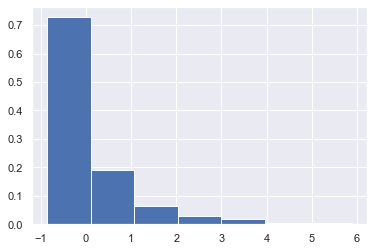

In [52]:
sample_h_2 = pd.DataFrame(((df1.price)-(df1.price).mean())/(df1.price).std())
hist_h_2 = plt.hist(sample_h_2, bins=7,density=True)
sample_h_2

Перевіримо наші дані на розподіл Пуасона.

Mean:  1220.6269615587153
Variance:  1220.6269615587153
Skew:  0.02862256305101782
Kurtosis:  0.0008192511156094904
Probability mass function:  [0.00000000e+000 1.85978018e-269 2.37394637e-193 ... 1.02408339e-115
 0.00000000e+000 4.57650378e-103]
Cumulative distribution function:  [0.00000000e+000 2.27955252e-269 3.30780563e-193 ... 1.00000000e+000
 1.00000000e+000 1.00000000e+000]


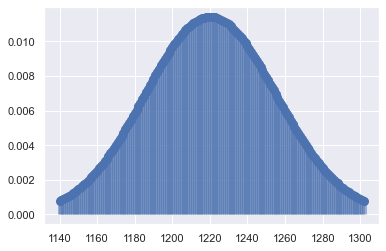

In [53]:
mu = df1['price'].mean()
var = df1['price'].var()
skew = df1['price'].skew()
kurt = df1['price'].kurt()
mean, var, skew, kurt = sps.poisson.stats(mu, moments='mvsk')
print("Mean: ", mean)
print("Variance: ", var)
print("Skew: ", skew)
print("Kurtosis: ", kurt)
print("Probability mass function: ", sps.poisson(mu).pmf(df1['price']))
print("Cumulative distribution function: ", sps.poisson(mu).cdf(df1['price']))

fig, ax = plt.subplots(1, 1)

x = np.arange(sps.poisson.ppf(0.01, mu),
              sps.poisson.ppf(0.99, mu))
ax.plot(x, sps.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, sps.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

plt.show()

Зауважуємо, що розподілення Пуасона досить точно описує наші дані.

Стандартизуємо нашу модель за допомогою метода preprocessing.StandardScaler

In [54]:
from sklearn import preprocessing
scale_features_std = preprocessing.StandardScaler()
features_train = scale_features_std.fit_transform(np.array(df1.price).reshape(-1, 1)) 

features_test = scale_features_std.transform(np.array(df1.price).reshape(-1, 1))
print(features_test,features_train,sep="\n")

[[-0.81002694]
 [-0.70030026]
 [-0.61589512]
 ...
 [ 0.61853002]
 [ 1.94439407]
 [ 0.57984434]]
[[-0.81002694]
 [-0.70030026]
 [-0.61589512]
 ...
 [ 0.61853002]
 [ 1.94439407]
 [ 0.57984434]]


## Гипотеза №2

Перевіримо гіпотезу про те, що ціни на товари, що мають декілька кольорів статистично не відрізняються від цін на монохромні товари.


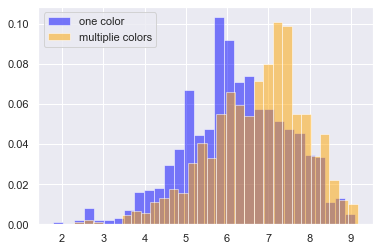

In [55]:
one_color = df1[df1['other_colors'] == 'No']['price'].apply(np.log)
mult_color = df1[df1['other_colors'] == 'Yes']['price'].apply(np.log)
one_color.name, mult_color.name = 'one color', 'multiplie colors'

one_color.hist(alpha=0.5, color='blue', weights=[1./len(one_color)]*len(one_color), bins=30)
mult_color.hist(alpha=0.5, color='orange', weights=[1./len(mult_color)]*len(mult_color), bins=30)
plt.legend([one_color.name, mult_color.name])

Так як вже відомо, що ціна не має нормального розподілення, то для визначення p-value треба перевірити критерій Манна-Уитні

In [56]:
stats.mannwhitneyu(one_color, mult_color).pvalue

1.0015089882617485e-21

Очевидно, що p-value - меньше 0.01, отже гіпотеза не може бути прийнята. Це означає, що колір впливає на розподіл ціни.

Перевіримо p-value на тесті Стьюдента.

In [57]:
stats.ttest_ind(one_color, mult_color, equal_var=False).pvalue

4.28586956819131e-21

Цей тест теж показує, що наша гіпотеза невірна, адже значення p-value дуже мале.

## Гипотеза №3

Перевіримо гіпотезу про те, що ціни на товари, що містяться в різних прайсах (нових та старих) статистично не відрізняються.

In [9]:
# Створимо функцію, яка перетворює ряд даних 'old_price' в такий, що містить тільки 2 категорії: old price і No old price

def cleanPrice(value):
    if value[0]=="S":
        return "old price"
    else:
        return "No old price"

In [59]:
df1["old_price1"] = df1["old_price"].apply(cleanPrice, 'No old price') 
df1["old_price1"].value_counts()

No old price    1541
old price        358
Name: old_price1, dtype: int64

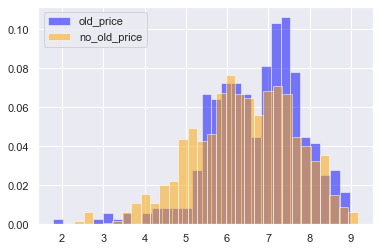

In [60]:
old_price = df1[df1['old_price1'] == 'old price']['price'].apply(np.log)
no_old_price = df1[df1['old_price1'] == 'No old price']['price'].apply(np.log)
old_price.name, no_old_price.name = 'old_price', 'no_old_price'

old_price.hist(alpha=0.5, color='blue', weights=[1./len(old_price)]*len(old_price), bins=30)
no_old_price.hist(alpha=0.5, color='orange', weights=[1./len(no_old_price)]*len(no_old_price), bins=30)
plt.legend([old_price.name, no_old_price.name])

Так як вже відомо, що ціна не має нормального розподілення, то для визначення p-value треба перевірити критерій Манна-Уитні

In [61]:
stats.mannwhitneyu(old_price, no_old_price).pvalue

1.1670419054768156e-05

Очевидно, що p-value - меньше 0.01, отже гіпотеза не може бути прийнята. Це означає, що тип прайсу впливає на розподіл ціни.

Перевіримо p-value на тесті Стьюдента.

In [62]:
stats.ttest_ind(old_price, no_old_price, equal_var=False).pvalue

8.594253789542695e-06

Цей тест теж показує, що наша гіпотеза невірна, адже значення p-value дуже мале.

# 4. Прогнозування ціни на товар

#### На початку дослідження вже відмічалось:

- деякі стовпці, на кшталт 'item_id','name','link','short_description'. Вказані поля мало інформативні, адже ми не маємо жливості ні яким чином утворити аналітичну групу по ним, так як дані в них є суто індивідуального для кожного товара; 
- поле 'sellable_online' має абсолютно нерівномірний поділ, тому була згнерован пропозиція стосовно дослідження  на основі відфільтрованих даних, або взагалі можна видалити цей стовпець, так як він нерепрезентативний відповідно групувань за вказаними позиціями: 

```
df1['sellable_online'].value_counts()

True     1886
False      13
Name: sellable_online, dtype: int64
```

Такий вигляд має групування по полю у таблиці із видаленими (відровідно до першого пункту) полями.
  
- стосовно поля 'designer', очевидно, що дані в ньому треба приводити до стандартного вигляду (очищувати, стандартизувати та уніфікувати), адже поле є достить інформативним і потенційно, швидше за все, має вплив на формування ціни на товар, але дані, що містяться в ньому, в чистому вигляді неможливо використовувати для аналізу.  

In [1]:
# Створимо функцію для очищення даних у полі 'designer'

def cleanDesigners(value, removeIKEA=False, emptyValue="IKEA of Sweden"):
    # якщо рядок повертає шукане значення, то нічого не змінювати
    if not isinstance(value, str):
        return value
    # якщо рядок повертає пусте значення або починається з цифри, то повернути emptyValue
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    # розіб'ємо рядок за  "/" 
    designers = value.split("/")
    if removeIKEA:
        # намагаємось видалити елемент "IKEA of Sweden"
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        # повертаємо рядок відсортований за іменем дизайнерів
        return '/'.join(sorted(designers))
    else:
        # або пусту, якщо список пустий
        return emptyValue


In [4]:
# Працюємо з повним списком безфільтрації по устим значенням у полях 

df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col=0).drop_duplicates()
df["designer_clean"] = df["designer"].apply(cleanDesigners, args=(False, "IKEA of Sweden")) #error to nan
df["designer_clean"].value_counts()

IKEA of Sweden                                                     971
Ehlén Johansson                                                    161
Francis Cayouette                                                  151
Ehlén Johansson/IKEA of Sweden                                     145
Ola Wihlborg                                                       134
                                                                  ... 
Eva Lilja Löwenhielm/IKEA of Sweden/Jon Karlsson                     1
A Huldén/S Dahlman                                                   1
Ehlén Johansson/Fredriksson/Hilland/IKEA of Sweden/L Löwenhielm      1
Malin Unnborn                                                        1
Lars Norinder                                                        1
Name: designer_clean, Length: 199, dtype: int64

In [5]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,designer_clean
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Nicholai Wiig Hansen
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,Francis Cayouette
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,Francis Cayouette
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Henrik Preutz
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,Marcus Arvonen


Видалимо незначущі стовпці, що були вказані вище:

In [6]:
df = df.drop(['item_id','name','link','short_description'], axis=1)
df.columns

Index(['category', 'price', 'old_price', 'sellable_online', 'other_colors',
       'designer', 'depth', 'height', 'width', 'designer_clean'],
      dtype='object')

Додамо стовпець знчень - `Volume`

In [7]:
df['volume'] = df['depth']*df['height']*df['width']

In [10]:
df["old_price1"] = df["old_price"].apply(cleanPrice, 'No old price') 
df["old_price1"].value_counts()

No old price    3040
old price        654
Name: old_price1, dtype: int64

In [11]:
df.isnull().sum()

category              0
price                 0
old_price             0
sellable_online       0
other_colors          0
designer              0
depth              1463
height              988
width               589
designer_clean        0
volume             1795
old_price1            0
dtype: int64

Доповнимо відсутні габарити з використанням можливостей SimpleImputer.

In [98]:
X = df[['depth','width','height','category','designer_clean','other_colors']]
X1 = df[['volume','category','designer_clean','other_colors']]
X3 = df[['depth','width','height','category','designer_clean','old_price1']]

Y = df['price']
Y1 = df['price']
Y3 = df['price']

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
X1_train, X1_test, Y1_train, Y1_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)
X3_train, X3_test, Y3_train, Y3_test = sk.model_selection.train_test_split(X3, Y3, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth','width','height']),
    ('categorical', categorical_transf, ['category','designer_clean','other_colors'])
])

col_prepr1 = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['volume']),
    ('categorical', categorical_transf, ['category','designer_clean','other_colors'])
])


col_prepr3 = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth','width','height']),
    ('categorical', categorical_transf, ['category','designer_clean','old_price1'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    # ('dtr', RandomForestRegressor(max_depth = 100))
    ('dtr', DecisionTreeRegressor(max_depth = 10, random_state=42))
])

dtr1 = Pipeline(steps=[
    ('col_prep', col_prepr1),
    # ('dtr', RandomForestRegressor(max_depth = 100))
    ('dtr', DecisionTreeRegressor(max_depth = 10, random_state=42))
])


dtr3 = Pipeline(steps=[
    ('col_prep', col_prepr3),
    # ('dtr', RandomForestRegressor(max_depth = 100))
    ('dtr', DecisionTreeRegressor(max_depth = 10, random_state=42))
])

print('Перший набір даних: ')
dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))
print('')
print('Другий набір даних: ')
dtr1.fit(X1_train, Y1_train)
dtr1_predict = dtr1.predict(X1_test)
print('R^2 : {:.5f}'.format(dtr1.score(X1_test, Y1_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr1_predict, Y1_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr1_predict, Y1_test))))
print('')
print('Третій набір даних: ')
dtr3.fit(X3_train, Y3_train)
dtr3_predict = dtr3.predict(X3_test)
print('R^2 : {:.5f}'.format(dtr3.score(X3_test, Y3_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr3_predict, Y3_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr3_predict, Y3_test))))

Перший набір даних: 
R^2 : 0.74147
MAE : 396.26201
MSE : 705.91036

Другий набір даних: 
R^2 : 0.51581
MAE : 599.65655
MSE : 966.05995

Третій набір даних: 
R^2 : 0.73222
MAE : 401.43445
MSE : 718.42457


Перша модель на 3-х наборах даних показала 3 різні результати, де найкращий результат є такий:

```
Перший набір даних: 
R^2 : 0.74147
MAE : 396.26201
MSE : 705.91036
```
Для покращення прогнозу можна використати такі засоби:
- Заповнити пусті елементи а розмірностіх згідно среднього значення по групі товару;
- Використати інший метод кодування категорій та дизайнерів;
- Підібрати інший регресор;
- обрати найбільш оптимальні параметри регресора.

Спочатку корегуємо таблицю даних:

- Додаємо поле кольору збінарними значеннями:

In [99]:
df["other_colors_1"] = df["other_colors"].map(dict(Yes=1, No=0))

- Розраховуємо середнє значення об'ємних параметрів по категоріям та заповнюємо відповідні пусті комірки

In [12]:
median_d = df.groupby(['category'])['depth'].median()
median_h = df.groupby(['category'])['height'].median()
median_w = df.groupby(['category'])['width'].median()

median_price = df.groupby(['category'])['price'].median()
median_dsgn = df.groupby(['designer_clean'])['price'].median()

df = df.set_index(['category'])
df['depth_1'] = df['depth'].fillna(median_d)
df['height_1'] = df['height'].fillna(median_h)
df['width_1'] = df['width'].fillna(median_w)
df['category_median_price'] = median_price
df['volume_1'] = df['depth_1']*df['height_1']*df['width_1']
df = df.reset_index()

df = df.set_index(['designer_clean'])
df['designer_median_price'] = median_dsgn
df = df.reset_index()

df.head()

,designer_clean,category,price,old_price,sellable_online,other_colors,designer,depth,height,width,volume,old_price1,depth_1,height_1,width_1,category_median_price,volume_1,designer_median_price
0,Nicholai Wiig Hansen,Bar furniture,265.0,No old price,True,No,Nicholai Wiig Hansen,NaN,99.0,51.0,NaN,No old price,47.0,99.0,51.0,445.0,237303.0,265.0
1,Francis Cayouette,Bar furniture,995.0,No old price,False,No,Francis Cayouette,NaN,105.0,80.0,NaN,No old price,47.0,105.0,80.0,445.0,394800.0,458.0
2,Francis Cayouette,Bar furniture,2095.0,No old price,False,No,Francis Cayouette,NaN,NaN,NaN,NaN,No old price,47.0,102.0,48.0,445.0,230112.0,458.0
3,Henrik Preutz,Bar furniture,69.0,No old price,True,Yes,Henrik Preutz,50.0,100.0,60.0,300000.0,No old price,50.0,100.0,60.0,445.0,300000.0,495.0
4,Marcus Arvonen,Bar furniture,225.0,No old price,True,No,Marcus Arvonen,60.0,43.0,74.0,190920.0,No old price,60.0,43.0,74.0,445.0,190920.0,150.0


- Перевіряємно на наявність пустих комірок у новостворених полях:

In [13]:
df.isnull().sum()

designer_clean              0
category                    0
price                       0
old_price                   0
sellable_online             0
other_colors                0
designer                    0
depth                    1463
height                    988
width                     589
volume                   1795
old_price1                  0
depth_1                     0
height_1                    0
width_1                     0
category_median_price       0
volume_1                    0
designer_median_price       0
dtype: int64

#### Для спрощення підбору параметрів виборок та моделі створимо процедуру, яка буде приймати вихід виборки та розраховувати оцінки для різних процесорів

In [102]:
def getBestRegressor(X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]

    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    #для каждой модели из списка
    for model in models:
        #получаем имя модели
        m = str(model)
        tmp['Model'] = m[:m.index('(')]    
        #обучаем модель
        model.fit(X_train, Y_train) 
        #вычисляем R^2 - коэффициент детерминации
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        #вычисляем MAE - средний модуль отклонения 
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        #вычисляем RMSE - корень из среднего квадрата отклонения
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))

        #записываем данные и итоговый DataFrame
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])
    #делаем индекс по названию модели
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res


### Тест №1

В якості першого тесту візьмемо габарити, розраховані по медіані в рамках категорії дизайнерів.
Перевіримо, який регресійний процесор продемонструє кращий результат.

In [103]:
X1 = df[['width_1','depth_1','height_1','category_median_price','designer_median_price','other_colors_1']]
Y1 = df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.83172,295.91918,569.52431
GradientBoostingRegressor,0.80978,360.96440,605.52095
DecisionTreeRegressor,0.78065,355.57681,650.23047
KNeighborsRegressor,0.71362,421.49250,742.96598
RidgeCV,0.70158,481.15383,758.41409
LinearRegression,0.70156,481.28499,758.43942
LassoCV,0.70152,473.40099,758.49673
SVR,0.68826,448.43841,775.16172


In [104]:
Y1.shape # Кількість аналізованих записів

(3694,)

За результатом першого тесту варто відмітити, що найкращий результат показала регресія RandomForestRegressor: з коефіцієнтом 0.83172
Иакож слідвідмітити, що для цього тесту з доповненими результатами пустих комірок метод DecisionTreeRegressor теж дав вищій результат ніж при першому обрахунку: коефіцієнт 0.78065 на відміну від 0.74147

### Тест №2

Видалимо рядки, які містять пусті записи по полям розмірностей. та проведемо регресивний аналіз за даними, що залишились. 

In [105]:
df2 = df.dropna(subset=['width','height','depth'])
X2 = df2[['width','depth','height','category_median_price','designer_median_price','other_colors_1']]
Y2 = df2['price']

test2 = getBestRegressor(X2, Y2)
test2['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.88104,326.01461,570.81199
GradientBoostingRegressor,0.86139,364.26370,616.15131
DecisionTreeRegressor,0.83272,374.27473,676.87191
RidgeCV,0.75505,538.95780,819.07733
LinearRegression,0.75501,538.99756,819.14734
LassoCV,0.75392,537.33236,820.96933
SVR,0.70911,535.16390,892.59118
KNeighborsRegressor,0.69949,530.48648,907.22940


In [106]:
Y2.shape # Кількість аналізованих записів після видалення пустих записів

(1899,)

Очевидно,що за методом RandomForestRegressor оефіцієнт регресії збільшився практично на 0,05 і, відповідно став:  0.88104. Але при цьому ми маємо очевидне збільшення відхилення (absolute_error) та дисперсії (squared_error). це може бути наслідком того, що ми прибрали записи з усередненими розрахованими даними і глибина вибірки стала меньша. Ящо порівняти обсяги даних, то 2 тест проводився на вибірці майже в двічі меншій за ту, на якій проводився перший тест.
Також слідзауважити, що DecisionTreeRegressor в цьому експерименті має значно вище значення коефіцієнта регресії ніж розраховане під час етапу побудови гіпотез. 

### Тест №3.

Виконаємо очистку даних по полю designer таким чином, щоб зменшити кількість унікальних елементів за цією категорію та уніфікувати записи.

In [108]:
df["designer_clean_2"] = df["designer"].apply(cleanDesigners, args=(True, "IKEA of Sweden"))

median_dsgn2 = df.groupby(['designer_clean_2'])['price'].median()

df = df.set_index(['designer_clean_2'])
df['designer_median_price2'] = median_dsgn2
df = df.reset_index()

df["designer_clean_2"].value_counts()

IKEA of Sweden                        971
Ehlén Johansson                       306
Jon Karlsson                          170
Ola Wihlborg                          165
Francis Cayouette                     164
                                     ... 
E Thomasson/P Süssmann                  1
Magnus Elebäck                          1
Andreas Fredriksson/Marcus Arvonen      1
Lars Norinder                           1
Lisel Garsveden                         1
Name: designer_clean_2, Length: 157, dtype: int64

In [109]:
df3 = df.dropna(subset=['width','depth','height'])
X3 = df3[['width','depth','height','category_median_price','designer_median_price2','other_colors_1']]
Y3 = df3['price']

test3 = getBestRegressor(X3, Y3)
test3['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.88129,326.26835,570.19801
GradientBoostingRegressor,0.85956,373.31200,620.20566
DecisionTreeRegressor,0.80632,403.59155,728.33313
KNeighborsRegressor,0.74928,502.17479,828.67375
LassoCV,0.74099,555.87528,842.26185
RidgeCV,0.74099,557.54451,842.25115
LinearRegression,0.74095,557.58138,842.32463
SVR,0.69356,554.12453,916.12583


In [110]:
Y3.shape

(1899,)

За найкращою моделлю результат практично не змінився, трошки зросло значення кефіцієнта регресії. 
Очевидно, що найкращий результат продемонструвала модель RandomForestRegressor. Вона повертала найкращі характеристики по усім 3-м тестам.

#### Проведемо кросвалідацію та з'ясуємо оптимальні параметри для приоритетної моделі

Використаємо функцію GridSearchCV.

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Estimator : RandomForestRegressor(max_depth=100, max_features='sqrt')
Best Score     : 0.8639252837827305

R^2            : 0.87146
MAE            : 333.40288
RMSE           : 593.34731

Feature importance:
--------------------------------
0.40975    width
0.19285    depth
0.10416    height
0.11261    category_median_price
0.16527    designer_median_price
0.01537    other_colors_1


<AxesSubplot:>

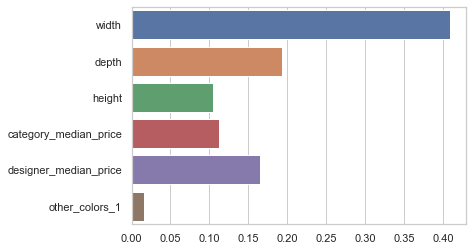

In [113]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X2, Y2, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,50,100,110,120,130, 140,150,200,500], 'max_depth': [10,100,200,None], 'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=3)
forest_grid.fit(X_train, Y_train)

print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')
for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

<AxesSubplot:xlabel='price'>

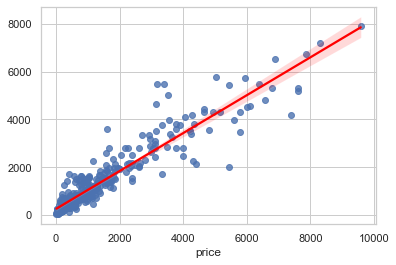

In [114]:
sns.regplot(x=Y_test, y=forest_grid.predict(X_test),line_kws={'color':'red'})

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Estimator : RandomForestRegressor(max_depth=200, max_features='sqrt', n_estimators=150)
Best Score     : 0.859301695072174

R^2            : 0.87482
MAE            : 334.93624
RMSE           : 585.54556

Feature importance:
--------------------------------
0.45793    width
0.19993    depth
0.10052    height
0.10687    category_median_price
0.11840    designer_median_price2
0.01636    other_colors_1


<AxesSubplot:>

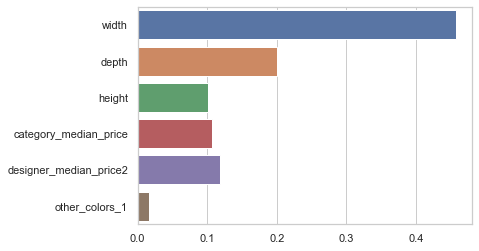

In [115]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X3, Y3, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,50,100,110,120,130, 140,150,200,500], 'max_depth': [10,100,200,None], 'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=3)
forest_grid.fit(X_train, Y_train)

print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')
for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

<AxesSubplot:xlabel='price'>

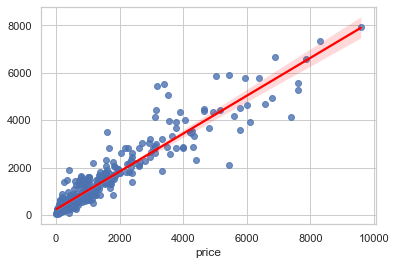

In [116]:
sns.regplot(x=Y_test, y=forest_grid.predict(X_test),line_kws={'color':'red'})

Після проведення кросвалідації на 2-х наборах даних, взятих з тестів 2 та 3 можжна відмітити, що однаково важлива позиція,  що впливає на формування ціни товару, є  'width', що за пібором параметрів ма значеня 0.40975 та 0.45793 для 2-го та 3-го рабору тестови даних.
Параметри коефіцієнта регресії, відхилення та дисперсії для тестових даних 2-го тесту визначені такими: 
```
R^2            : 0.87146
MAE            : 333.40288
RMSE           : 593.34731
```
Параметри коефіцієнта регресії, відхилення та дисперсії для тестових даних 3-го тесту визначені такими: 
```
R^2            : 0.87482
MAE            : 334.93624
RMSE           : 585.54556
```
Очевидно, що для 3-го набору тестових даних експеримент показав кращі параметри, виходячи з того,  що коефіцієнт регресії збільшився, а дисперсія зменшилась по відношенню до 2-го тестового набору даних. незначним чином збільшилось відхидення. 

### Пропозиції стосовно покращення моделі дослідження.

На основі вище проведеного дослідження можна зробити висновок, що для покращення здатності моделі до прогнозування необхідно:
 - очищення даних від таких, що не дають зробити групову аналітику та містять, не впливаючу на дослідження, унікальну інформацію по кожному окремому запису (видалення неінформативних полів);
 - необхідно покращувати якість даних (стандартизація, приведення до числових або булевих значень);
 - позбавляись Null значень, які "споплюжують" статистику, можна скористатись такими методами:
     - видалення рядків з пустими значеннями;
     - автозаповнення їх за якимось правилом, що не псує загальну логіку групування даних.
     
##### Стосовно пропозицій до покращення конкретної моделі:

1. Важлива доочистка даних по полю "designer", яка б дала максимальну уніфікацію даних по ньому. Можна використати різні методи та дослідити результати на чистоту експеримента (варіанти "або"):
     - максимально зменшити обсяг унікальних елементів поля за рахунок об'єднання великих груп дизайнерів у значення "інші";
     - зменшити обсяг унікальних елементів поля за рахунок виділення зі спискі дизайнерів найбільш "популярних";
     - зменшити обсяг унікальних елементів поля за рахунок виділення зі мписків дизайнерів "перших за списком";
     - зменшити обсяг унікальних елементів поля за рахунок виділення зі списків дизайнерів об'єкта IKEA of Sweden.

2. Можливе додаткове дослідження на основі даних про прайси (новий або "старий"). Що буде неможливим, якщо не доочистити дані в полі "old_price" і не привести його до булевог зачення. Адже ми з'ясували,що принадежність до певного типу прайсу є статистично значимим.

3. Оптимізувати модель за допомогою додаткового поля, в якому розраховується об'єм товара до регресивного аналізу та подальшої кросвалідаці, адже в моєму випадку ця модель чомусьне не прораховувалась в жодному з варіантів педставлення даних (дивись далі): 
 

```
df4 = df.dropna(subset=['width','depth','height'])
X4 = df4[['volume_1','category_median_price','designer_median_price2','other_colors_1']]
Y4 = df4['price']

test4 = getBestRegressor(X4, Y4)
test4['model'].sort_values(by='R^2', ascending=False)

```